In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pickle
import json
import numpy as np
from features import merge_entries, prepare_entry
from utills import chunker, cartesian_product
import glob
from tqdm.auto import trange, tqdm
import pickle
import av_analysis as av

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.style as style
from matplotlib import rcParams
%matplotlib notebook
style.use('seaborn-whitegrid')


In [4]:
import seaborn as sns

In [5]:
PAN_MODEL_PATH = '../../pan2021/authorship_verification/temp_data/large_model_training_data/large_model.p'

In [111]:
analysis = av.AVAnalysis(PAN_MODEL_PATH)

In [41]:
gpt3_docs = av.load_generated_docs('../temp_data/gpt3_new/new_human_gpt3_preprocessed.jsonl')

Read: 106
Avg Lengths:
Human 1:    4941.38
Human 2:    4923.18
AI 1:       4824.05
AI 2:       4758.64


In [15]:
gpt3_results = analysis.apply_model(gpt3_docs)

Human - Human:          0.765
Human - AI:             0.404
AI - AI:                0.938
AI - AI (Diff Author):  0.900


In [42]:
chatgpt_docs = av.load_generated_docs('../temp_data/chatgpt/new_human_chatgpt_preprocessed.jsonl')

Read: 112
Avg Lengths:
Human 1:    4947.77
Human 2:    4923.46
AI 1:       4654.77
AI 2:       4534.51


In [17]:
chatgpt_results = analysis.apply_model(chatgpt_docs)

Human - Human:          0.766
Human - AI:             0.284
AI - AI:                0.870
AI - AI (Diff Author):  0.806


In [92]:
all_docs_dict = {
    'human_1': (gpt3_docs[0], gpt3_docs[4]),
    'human_2': (gpt3_docs[1], gpt3_docs[4]),
    'chatgpt_1': (chatgpt_docs[2],chatgpt_docs[4]),
    'chatgpt_2': (chatgpt_docs[3], chatgpt_docs[4]),
    'gpt3_1': (gpt3_docs[2], gpt3_docs[4]),
    'gpt3_2': (gpt3_docs[3], gpt3_docs[4])
}

In [100]:
key_roots = ['human', 'chatgpt', 'gpt3']

In [93]:
res = analysis.apply_model_multiple_sets(all_docs_dict, key_roots)

human - human: 0.763
chatgpt - human: 0.282
chatgpt - chatgpt: 0.860
gpt3 - human: 0.399
gpt3 - chatgpt: 0.904
gpt3 - gpt3: 0.937


<IPython.core.display.Javascript object>


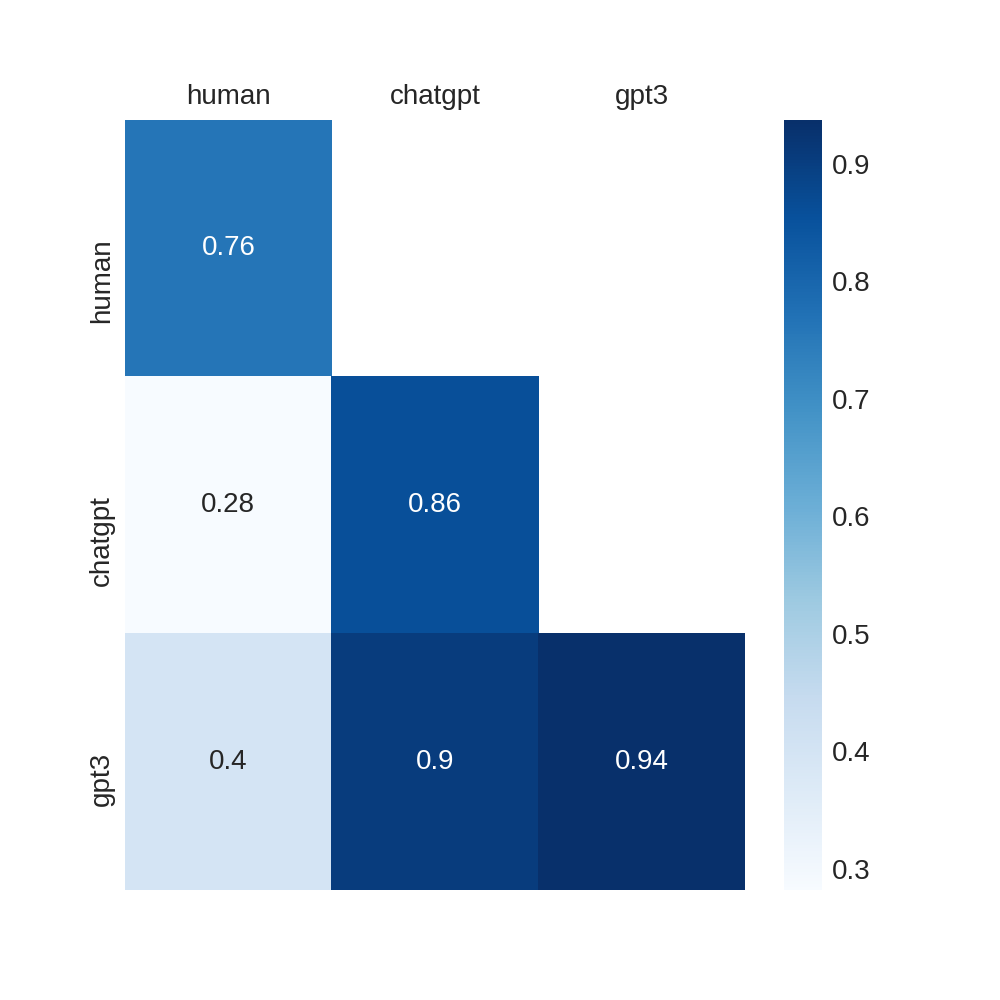

<AxesSubplot:>

In [113]:
analysis.plot_multiple_set_result(res, key_roots)